Import, Clean, and Organize Dataframe

In [ ]:

#################import packages#####################################
import numpy as np #numpy
import pandas as pd #pandas 
import matplotlib.pyplot as plt #matplotlib
import seaborn as sns #seaborn
import scipy.stats as stats

############################ load data set ######################################
scores = pd.read_csv("sustainablescores.csv")   # identify data set as scores 
scores.head(10)                                  # preview data set - top rows




Company Name Ticker Country  \
0                          0921706 BC LTD    NaN      CA   
1                1 MADISON OFFICE FEE LLC    NaN      US   
2                                  1&1 AG    1U1      DE   
3                   1-800-FLOWERSCOM, INC   FLWS      US   
4                         1000 AUAHI, LLC    NaN      US   
5  1011778 BC UNLIMITED LIABILITY COMPANY    NaN      CA   
6                        10X Genomics Inc    TXG      US   
7                          1334 YORK, LLC    NaN      US   
8                        180 MEDICAL, INC    NaN      US   
9                   1LIFE HEALTHCARE, INC   ONEM      US   

                                             Sector  \
0                        Telecommunication Services   
1                 Real Estate Management & Services   
2                        Telecommunication Services   
3                   Retail - Consumer Discretionary   
4  Real Estate Development & Diversified Activities   
5                                       Restaurants   
6                  Health Care Equipment & Supplies   
7                     Diversified Consumer Services   
8                  Health Care Equipment & Supplies   
9                  Health Care Providers & Services   

                             Subsector Overall ESG RATING  Overall ESG SCORE  \
0  Wireless Telecommunication Services                  A                6.6   
1                         Office REITs                BBB                4.7   
2  Wireless Telecommunication Services                  B                2.0   
3   Internet & Direct Marketing Retail                BBB                5.6   
4              Real Estate Development                  A                6.8   
5                          Restaurants                 BB                3.9   
6       Life Sciences Tools & Services                 BB                3.4   
7                                  NaN                BBB                5.5   
8                 Health Care Supplies                 AA                8.4   
9                 Health Care Services                  A                6.3   

   Environmental SCORE  Social SCORE  Governance SCORE  
0                 10.0           7.4               2.7  
1                  8.5           5.8               2.6  
2                  7.8           3.3               4.4  
3                  1.2           6.7               3.8  
4                  6.1           4.1               6.9  
5                  5.3           3.6               4.4  
6                  6.1           3.9               5.1  
7                  6.7           5.4               3.6  
8                 10.0           5.2               7.1  
9                  6.3           6.0               4.2

In [ ]:
######################### profile the dataset ################################
scores.info() #identify non-null count and data types by column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15646 entries, 0 to 15645
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         15646 non-null  object 
 1   Ticker               10441 non-null  object 
 2   Country              15644 non-null  object 
 3   Sector               15646 non-null  object 
 4   Subsector            14860 non-null  object 
 5   Overall ESG RATING   15646 non-null  object 
 6   Overall ESG SCORE    15646 non-null  float64
 7   Environmental SCORE  15646 non-null  float64
 8   Social SCORE         15646 non-null  float64
 9   Governance SCORE     15646 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [ ]:
#######################  number of missing value by column ########################
scores.isnull().sum()
# ticker and subsector columns have many missing values, which is not highly important to the analysis

Company Name              0
Ticker                 5205
Country                   2
Sector                    0
Subsector               786
Overall ESG RATING        0
Overall ESG SCORE         0
Environmental SCORE       0
Social SCORE              0
Governance SCORE          0
dtype: int64

In [ ]:
#drop the ticker column given high # of missing values and it no essentential value to this analysis
scores.drop(["Ticker"], axis=1, inplace=True)  
scores.isnull().sum()  #recheck missing data stats
scores.isnull().sum()

Company Name             0
Country                  2
Sector                   0
Subsector              786
Overall ESG RATING       0
Overall ESG SCORE        0
Environmental SCORE      0
Social SCORE             0
Governance SCORE         0
dtype: int64

In [ ]:
#drop any rows with missing data:
scores.dropna(axis=0, how="any", inplace=True)
scores.isnull().sum() #check for any missing dat

# 788 rows are not vital as 15,560 companies were analyzed 

Company Name           0
Country                0
Sector                 0
Subsector              0
Overall ESG RATING     0
Overall ESG SCORE      0
Environmental SCORE    0
Social SCORE           0
Governance SCORE       0
dtype: int64

In [ ]:
scores.shape  # recheck shape 

(14858, 9)

In [ ]:
####### list the number of unqiue values by column##########
scores.nunique()

Company Name           14778
Country                  103
Sector                    68
Subsector                159
Overall ESG RATING         7
Overall ESG SCORE        117
Environmental SCORE      101
Social SCORE             101
Governance SCORE          87
dtype: int64

In [ ]:


######################## count unique countries and list them #########################
countrycount = len(scores['Country'].unique())  # count unique 
print("\n unique countries: " +str(countrycount))
from typing import MappingView
countries = scores['Country'].unique().tolist()  # list the unique countries 
countries.sort()  #sort the country list
print(countries)

 
################ count unique sectors and list them #################################
sectorcount = len(scores['Sector'].unique())  # count unique 
print ("\n unique sectors: " + str(sectorcount))
from typing import MappingView
sectors = scores['Sector'].unique().tolist()       # list the unique countries 
sectors.sort()
print(sectors)
 
################ count unique subsectors and list them #################################
subsectorcount = len(scores['Subsector'].unique()) # count unique 
print("\n  unique subsectors: " +str(subsectorcount))
from typing import MappingView
subsectors = scores['Subsector'].unique().tolist()       # list the unique countries 
subsectors.sort()
print(subsectors)



 unique countries: 103
['AE', 'AR', 'AT', 'AU', 'AW', 'BB', 'BE', 'BF', 'BG', 'BH', 'BM', 'BR', 'BS', 'CA', 'CH', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY', 'CZ', 'DE', 'DJ', 'DK', 'DO', 'EE', 'EG', 'ES', 'FI', 'FO', 'FR', 'GB', 'GE', 'GG', 'GI', 'GR', 'HK', 'HR', 'HU', 'ID', 'IE', 'IL', 'IM', 'IN', 'IT', 'JE', 'JM', 'JO', 'JP', 'KE', 'KH', 'KR', 'KW', 'KY', 'KZ', 'LI', 'LT', 'LU', 'LV', 'MA', 'MH', 'MN', 'MO', 'MT', 'MU', 'MX', 'MY', 'MZ', 'NG', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PK', 'PL', 'PR', 'PT', 'PY', 'QA', 'RO', 'RU', 'SA', 'SE', 'SG', 'SI', 'SK', 'SN', 'TG', 'TH', 'TN', 'TR', 'TW', 'UA', 'US', 'UY', 'VG', 'VN', 'ZA', 'ZM']

 unique sectors: 68
['Aerospace & Defense', 'Air Freight & Logistics', 'Airlines', 'Asset Management & Custody Banks', 'Auto Components', 'Automobiles', 'Banks', 'Beverages', 'Biotechnology', 'Broadcasting, Cable & Satellite', 'Building Products', 'Casinos & Gaming', 'Commercial Services & Supplies', 'Commodity Chemicals', 'Construction & Engineering', '

Score Breakdown

In [ ]:


#################### ESG score summary #################################
min = scores["Overall ESG SCORE"].min()
max = scores["Overall ESG SCORE"].max()
print("\n min ESG score: " + str(min) + " and max ESG score: " + str(max))
avg = scores["Overall ESG SCORE"].mean()
print("average ESG score: " + str(avg))
median = scores["Overall ESG SCORE"].median()
print("median ESG score: " +str(median))
 
#################### Environmental score summary #################################
Emin = scores["Environmental SCORE"].min()
Emax = scores["Environmental SCORE"].max()
print("\n min Environemntal score: " + str(Emin) + " and max Environmental score: " + str(Emax))
Eavg = scores["Environmental SCORE"].mean()
print("average environmental score: " + str(Eavg))
Emedian = scores["Environmental SCORE"].median()
print("median environmental score: " +str(Emedian))


#################### Social score summary #################################
Smin = scores["Social SCORE"].min()
Smax = scores["Social SCORE"].max()
print("\n min social score: " + str(Smin) + " and max social score: " + str(Smax))
Savg = scores["Social SCORE"].mean()
print("average social score: " + str(Savg))
Smedian = scores["Social SCORE"].median()
print("median social score: " +str(Smedian))

#################### governance score summary #################################
Gmin = scores["Governance SCORE"].min()
Gmax = scores["Governance SCORE"].max()
print("\n min governance score: " + str(Gmin) + " and max governance score: " + str(Gmax))
Gavg = scores["Governance SCORE"].mean()
print("average governance score: " + str(Gavg))
Gmedian = scores["Governance SCORE"].median()
print("median govenrance score: " +str(Gmedian))


 min ESG score: 0.0 and max ESG score: 10.0
average ESG score: 5.1572735226813835
median ESG score: 5.3

 min Environemntal score: 0.0 and max Environmental score: 10.0
average environmental score: 5.324215910620541
median environmental score: 5.2

 min social score: 0.0 and max social score: 10.0
average social score: 4.600282675999462
median social score: 4.6

 min governance score: 0.0 and max governance score: 8.6
average governance score: 4.788073764975097
median govenrance score: 5.0


Scores by Country

In [ ]:
############# find ten best and ten worst Overall ESG scores by country #################
countrymean = (scores.groupby('Country')['Overall ESG SCORE'].mean().sort_values(ascending=False).to_frame())   #group data by country (mean); convert result to dataframe
print(countrymean.head(10)) #10 best
print(countrymean.tail(10)) #10 worst

         Overall ESG SCORE
Country                   
KH                8.400000
TG                8.400000
GI                8.400000
GE                8.100000
MZ                7.900000
ZM                7.900000
KE                7.866667
HR                7.800000
LI                7.800000
SK                7.662500
         Overall ESG SCORE
Country                   
QA                3.066667
KW                2.990000
KR                2.961018
EG                2.814286
RU                2.556167
TN                2.500000
VN                2.400000
SA                2.255814
JM                2.200000
BF                1.500000


In [ ]:
 ################# count the time a sector or country was included #############################

SCcount = scores[scores['Sector'].str.contains("Auto Components")].count()
print(SCcount)

Company Name           162
Country                162
Sector                 162
Subsector              162
Overall ESG RATING     162
Overall ESG SCORE      162
Environmental SCORE    162
Social SCORE           162
Governance SCORE       162
dtype: int64


In [ ]:
############# find ten best and ten worst environmetal scores by country #################
#all data is not highlighted in report, included in code for background info
test2 = (scores.groupby('Country')['Environmental SCORE'].mean().sort_values(ascending=False).to_frame())
print(test2.head(10))
print(test2.tail(10))

         Environmental SCORE
Country                     
JO                  9.700000
KH                  8.800000
JM                  8.000000
SN                  8.000000
SK                  7.937500
LT                  7.800000
PY                  7.600000
TG                  7.600000
UY                  7.433333
VN                  7.400000
         Environmental SCORE
Country                     
DJ                  3.500000
UA                  3.450000
SA                  3.409302
GE                  2.866667
EE                  2.500000
TN                  2.500000
LV                  2.500000
NG                  2.478571
FO                  2.100000
BB                  2.000000


In [ ]:
############ find ten best and ten worst social scores by country#################
#all data is not highlighted in report, included in code for background info
test3 = (scores.groupby('Country')['Social SCORE'].mean().sort_values(ascending=False).to_frame())
print(test3.head(10))
print(test3.tail(10))


         Social SCORE
Country              
JO           9.500000
LT           7.800000
SN           7.300000
GI           6.500000
KE           6.366667
DO           6.200000
FO           6.100000
PY           5.950000
CL           5.795082
MN           5.700000
         Social SCORE
Country              
MZ           4.000000
ZM           4.000000
CY           3.830000
GG           3.670588
CN           3.632788
EG           3.628571
SA           3.624419
TN           3.400000
EE           3.300000
LV           3.300000


In [ ]:
############ find ten best and ten worst governance scores by country#################
#all data is not highlighted in report, included in code for background info
test4 = (scores.groupby('Country')['Governance SCORE'].mean().sort_values(ascending=False).to_frame())
print(test4.head(10))
print(test4.tail(10))

         Governance SCORE
Country                  
DO               6.866667
BB               6.800000
AU               6.532080
FI               6.494828
GE               6.400000
NZ               6.374026
DK               6.245000
NO               6.232051
GB               6.106218
GG               6.041176
         Governance SCORE
Country                  
TR               3.022807
OM               2.900000
VN               2.900000
JO               2.600000
PH               2.500000
QA               2.469697
JM               2.100000
RU               2.086667
SN               1.100000
BF               1.000000


Scores by Sector

In [ ]:
############# find ten best and ten worst Overall ESG scores by sector #################
sectoroverall = (scores.groupby('Sector')['Overall ESG SCORE'].mean().sort_values(ascending=False).to_frame())
print(sectoroverall.head(10))
print(sectoroverall.tail(10))

                                  Overall ESG SCORE
Sector                                             
Road & Rail Transport                      6.623077
Banks                                      6.172700
Health Care Providers & Services           6.118995
Life & Health Insurance                    6.081123
Utilities                                  5.971609
Beverages                                  5.854237
Multi-Line Insurance & Brokerage           5.851974
Building Products                          5.720168
Professional Services                      5.497931
Telecommunication Services                 5.484448
                                          Overall ESG SCORE
Sector                                                     
Auto Components                                    4.338333
Broadcasting, Cable & Satellite                    4.227778
Construction & Engineering                         4.130132
Biotechnology                                      4.035443
Steel           

In [ ]:
############# find ten best and ten worst environmental scores by sector #################
#all data is not highlighted in report, included in code for background info
sectorenviro = (scores.groupby('Sector')['Environmental SCORE'].mean().sort_values(ascending=False).to_frame())
print(sectorenviro.head(10))
print(sectorenviro.tail(10))

                                       Environmental SCORE
Sector                                                    
Telecommunication Services                        8.961791
Integrated Telecommunication Services             8.300000
Media                                             8.100000
Broadcasting, Cable & Satellite                   8.094444
Asset Management & Custody Banks                  8.029730
Professional Services                             7.920690
Health Care Equipment & Supplies                  7.731940
Media & Entertainment                             7.655482
Air Freight & Logistics                           7.612069
Health Care Providers & Services                  7.607306
                                         Environmental SCORE
Sector                                                      
Property & Casualty Insurance                       3.266418
Aerospace & Defense                                 3.266387
Steel                                           

In [ ]:
############# find ten best and ten worst scoail scores by sector #################
#all data is not highlighted in report, included in code for background info
sectorsocial = (scores.groupby('Sector')['Social SCORE'].mean().sort_values(ascending=False).to_frame())
print(sectorsocial.head(10))
print(sectorsocial.tail(10))

                                                    Social SCORE
Sector                                                          
Integrated Telecommunication Services                   6.600000
Integrated Oil & Gas                                    6.034940
Trading Companies & Distributors                        5.932759
Telecommunication Services                              5.929552
Energy Equipment & Services                             5.652756
Oil & Gas Refining, Marketing, Transportation &...      5.570968
Health Care Equipment & Supplies                        5.508657
Beverages                                               5.492373
Professional Services                                   5.467586
Health Care Providers & Services                        5.440183
                                Social SCORE
Sector                                      
Construction & Engineering          3.879801
Investment Banking & Brokerage      3.864124
Air Freight & Logistics             3.75

In [ ]:
############# find ten best and ten worst governance scores by sector #################
#all data is not highlighted in report, included in code for background info
sectorgov = (scores.groupby('Sector')['Governance SCORE'].mean().sort_values(ascending=False).to_frame())
print(sectorgov.head(10))
print(sectorgov.tail(10))

                                     Governance SCORE
Sector                                               
Metals and Mining - Precious Metals          5.842478
Professional Services                        5.742759
Multi-Line Insurance & Brokerage             5.625000
Property & Casualty Insurance                5.614925
Life & Health Insurance                      5.495187
Containers & Packaging                       5.472941
Commercial Services & Supplies               5.434731
Real Estate Management & Services            5.407314
Leisure Products                             5.276744
Diversified Chemicals                        5.253846
                                                  Governance SCORE
Sector                                                            
Transportation Infrastructure                             4.053333
Telecommunication Services                                4.012537
Commodity Chemicals                                       3.998936
Real Estate Devel

Graphs

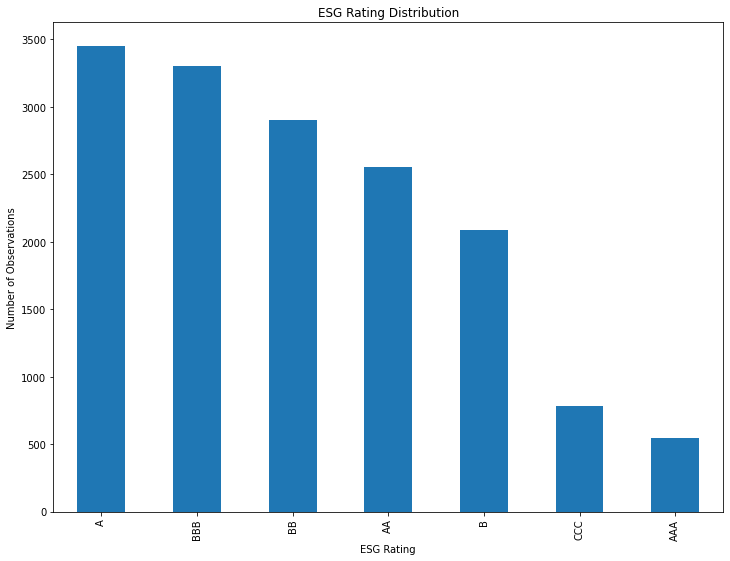

In [ ]:
 ############## histogram displaying count of ESG ratings ##################
histo = plt.figure(figsize =(12, 9))
plt.title('ESG Rating Distribution')
plt.xlabel("ESG Rating")
plt.ylabel("Number of Observations")
scores['Overall ESG RATING'].value_counts().plot(kind='bar')

In [ ]:
############### top 15 most observed countries#######################
n = 15
topcountries = scores['Country'].value_counts().index.tolist()[:n]
top15 = scores['Country'].value_counts()[:n]
print(top15)
print(scores['Overall ESG SCORE'][:n])


US    4582
JP    1193
CN    1101
GB     772
IN     576
KR     560
CA     476
AU     452
HK     415
BR     404
SE     251
NL     244
FR     238
DE     228
MY     208
Name: Country, dtype: int64
0     6.6
1     4.7
2     2.0
3     5.6
4     6.8
5     3.9
6     3.4
8     8.4
9     6.3
10    2.9
11    2.2
12    2.2
13    5.3
14    3.8
15    3.9
Name: Overall ESG SCORE, dtype: float64


US    4582
JP    1193
CN    1101
GB     772
IN     576
KR     560
CA     476
AU     452
HK     415
BR     404
SE     251
NL     244
FR     238
DE     228
MY     208
Name: Country, dtype: int64


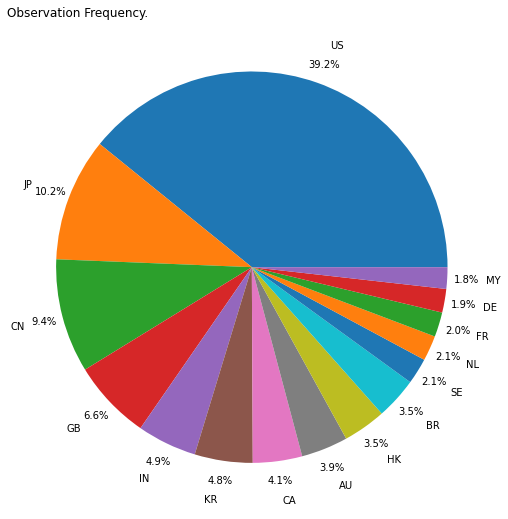

In [ ]:
######################### pie char of frequency of top 15 countries ########################
n = 15

plt.figure(figsize =(12, 9))
topcountries = scores['Country'].value_counts().index.tolist()[:n]
top15 = scores['Country'].value_counts()[:n]
print(top15)

plt.pie(top15, labels=topcountries, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2) # identify labels and adjust chart spacing
plt.title("Observation Frequency.", loc='left')
plt.show()


Text(0.5, 1.0, 'ESG Scores by Country')

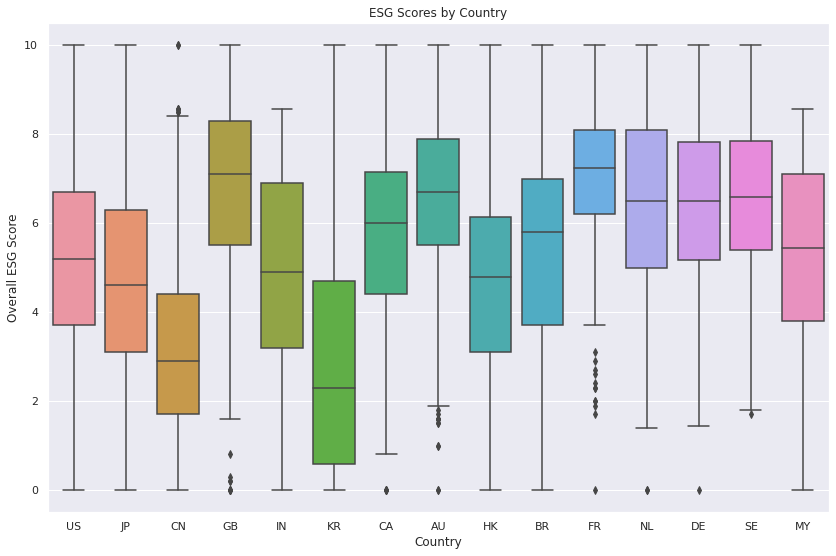

In [ ]:
 ######################### boxplot ESG Score by country ############################

 ### top 15 most observed 
 
sns.set(rc={'figure.figsize':(14,9)})
box = sns.boxplot(data = scores, y = 'Overall ESG SCORE', x = 'Country', order = ["US", "JP", "CN", "GB", "IN", "KR", "CA", "AU", "HK", "BR", "FR", "NL", "DE", "SE", "MY"])       # 15 most observed. taken from code above 
box.set_ylabel("Overall ESG Score")                              
box.set_xlabel("Country")                                 
box.set_title("ESG Scores by Country")   

 


In [ ]:
################ most observsed industries #######################
n = 15 # top 15 observations 
topindustries = scores['Sector'].value_counts().index.tolist()[:n]
top15industries = scores['Sector'].value_counts()[:n]
print(top15industries)

Banks                                                      1926
Utilities                                                  1013
Real Estate Management & Services                           752
Software & Services                                         572
Real Estate Development & Diversified Activities            444
Retail - Consumer Discretionary                             390
Investment Banking & Brokerage                              354
Telecommunication Services                                  335
Health Care Equipment & Supplies                            335
Food Products                                               329
Biotechnology                                               316
Oil & Gas Refining, Marketing, Transportation & Storage     310
Construction & Engineering                                  302
Media & Entertainment                                       301
Asset Management & Custody Banks                            296
Name: Sector, dtype: int64


Banks                                                      1926
Utilities                                                  1013
Real Estate Management & Services                           752
Software & Services                                         572
Real Estate Development & Diversified Activities            444
Retail - Consumer Discretionary                             390
Investment Banking & Brokerage                              354
Telecommunication Services                                  335
Health Care Equipment & Supplies                            335
Food Products                                               329
Biotechnology                                               316
Oil & Gas Refining, Marketing, Transportation & Storage     310
Construction & Engineering                                  302
Media & Entertainment                                       301
Asset Management & Custody Banks                            296
Name: Sector, dtype: int64


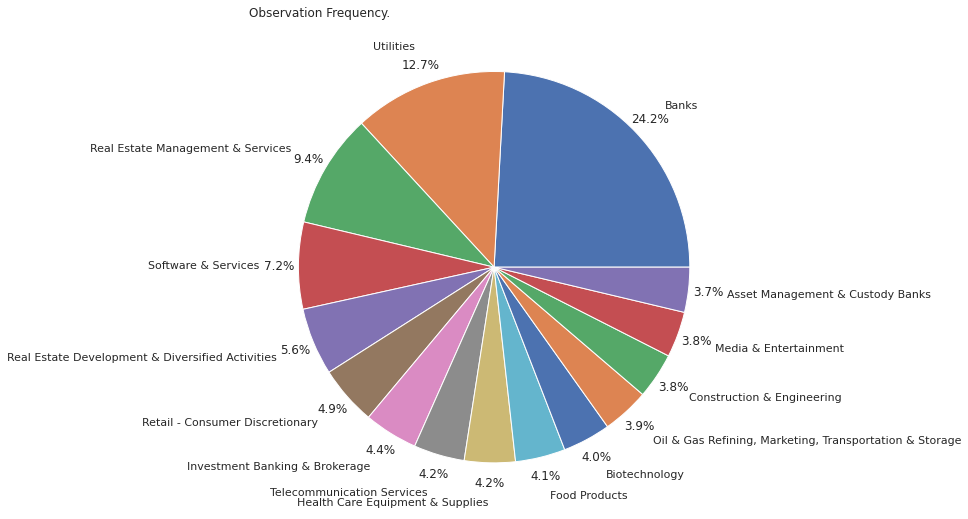

In [ ]:
######################### pie char of frequency of top 15 countries ########################
n = 15 # top 15 observations 

plt.figure(figsize =(12, 9))
topindustry = scores['Sector'].value_counts().index.tolist()[:n]
top15industry = scores['Sector'].value_counts()[:n]
print(top15industry)

plt.pie(top15industry, labels=topindustry, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2) # identify labels and adjust chart spacing
plt.title("Observation Frequency.", loc='left') # move title left
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

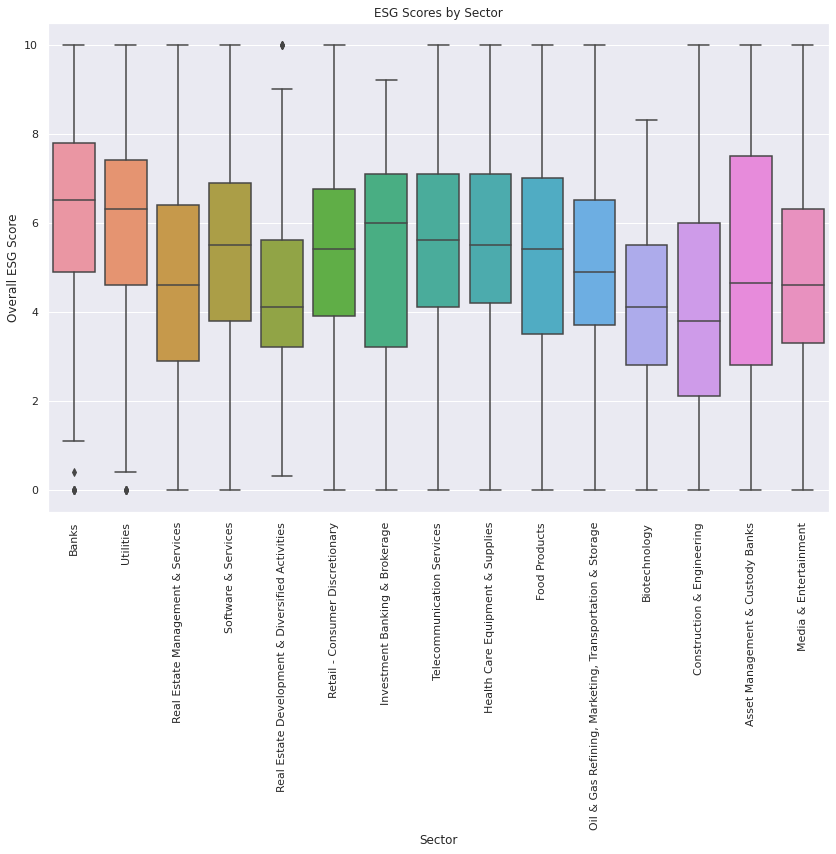

In [ ]:
 
######################### boxplot ESG Score by sector (15 most observed) ############################

box = sns.boxplot(data = scores, y = 'Overall ESG SCORE', x = 'Sector', 
                  order = ["Banks", "Utilities", "Real Estate Management & Services", "Software & Services", "Real Estate Development & Diversified Activities", "Retail - Consumer Discretionary", "Investment Banking & Brokerage", "Telecommunication Services", "Health Care Equipment & Supplies", "Food Products", "Oil & Gas Refining, Marketing, Transportation & Storage", "Biotechnology", "Construction & Engineering", "Asset Management & Custody Banks", "Media & Entertainment"])  

box.set_ylabel("Overall ESG Score")                              
box.set_xlabel("Sector")                             
box.set_title("ESG Scores by Sector")     

plt.xticks(rotation=90) # rotate labels 90 degrees 


Text(0.5, 1.0, 'Overall ESG Score Distribution by Rating')

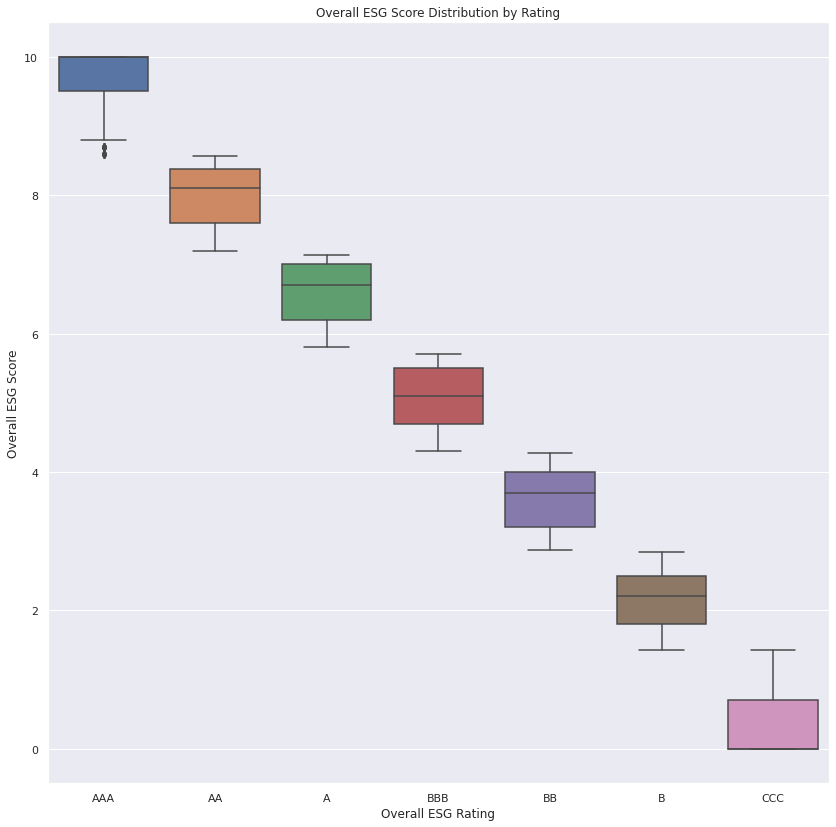

In [ ]:
############ create box plot esg overall vs esg rating ###################################
sns.set(rc={'figure.figsize':(14,14)})
box = sns.boxplot(data = scores, y = 'Overall ESG SCORE', x = 'Overall ESG RATING', order = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC"])      
box.set_ylabel("Overall ESG Score")                              
box.set_xlabel("Overall ESG Rating")                                 
box.set_title("Overall ESG Score Distribution by Rating")   

<Figure size 1440x1440 with 0 Axes>

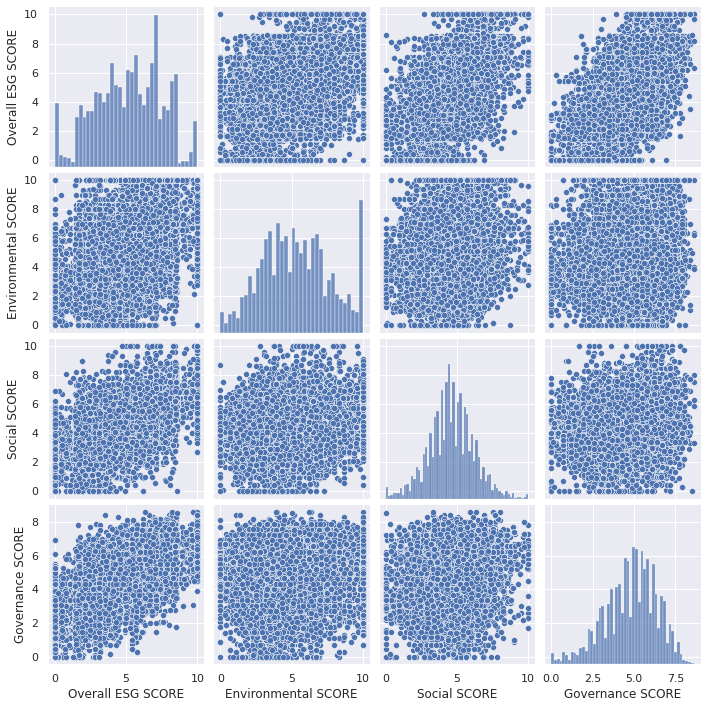

In [ ]:
#Create a pairplot to visualize a histogram of each score variable and a scatter plot of all score combinations
plt.figure(figsize = (20,20))
sns.pairplot(data=scores)

Statistics 

In [ ]:

scores.corr()    #create correlation matrix betwwen the score types

Overall ESG SCORE  Environmental SCORE  Social SCORE  \
Overall ESG SCORE             1.000000             0.442767      0.551851   
Environmental SCORE           0.442767             1.000000      0.228826   
Social SCORE                  0.551851             0.228826      1.000000   
Governance SCORE              0.608733             0.106493      0.104938   

                     Governance SCORE  
Overall ESG SCORE            0.608733  
Environmental SCORE          0.106493  
Social SCORE                 0.104938  
Governance SCORE             1.000000

In [ ]:
#Check the index status of the dataframe "scores" to confirm it is defualt
scores.index.names

FrozenList([None])

Appendix

In [ ]:
from google.colab import data_table
#Create a Second dataframe with a multilevel index which can be converted to interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter
scores2=scores.set_index(['Sector', 'Subsector']).sort_index()
data_table.DataTable(scores2, include_index=True, num_rows_per_page=1000)